In [1]:
# add dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000,size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [4]:
# use the print() to display the lats and lngs combo.

for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-3.1563655769541015 111.4258803000713
76.3296966948088 -126.7083867820282
-16.35606415292301 164.34182297380437
-81.15103744439075 -96.56909637653558
-69.60617531980394 -95.90791494942603
79.59089431020718 157.22243308610217
-40.33866542767124 27.910432150964766
-71.85197398113993 72.30650139185622
59.9653353755003 -104.42979910757676
-71.1287185080856 -96.79086509559025
81.8824911897809 28.317489821443672
-4.714919180153274 -73.24776954684876
42.956518382926674 177.4322486827217
33.655907989642856 -128.704445974846
-7.746386144767527 22.271953759989913
3.1096161220097542 129.14303011273893
70.43269555416421 60.65752671659911
-64.34953100614005 87.97925210736582
55.23136256929274 -6.25827815476805
-80.02930835286767 113.09729939730289
-63.69964091584236 15.0373459580604
-19.4163288635 -43.11770192362775
-42.98181453727399 -127.15749743330389
-8.989255317637031 101.87936685234683
-44.7500947931691 -7.241255369995258
75.270962065464 86.74839132361518
68.32503270942021 -118.50668906595511

In [5]:
from citipy import citipy

In [6]:
# create a list for holding the cities.

cities = []

# identify the nearest city for each lats and lngs combo.

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # if the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

605

In [7]:
import requests
from config import weather_api_key

In [8]:
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
import time
from datetime import datetime

In [10]:
# create an empty list to hold the weather data.
city_data = []

# print the beginning of the logging.
print("Beginning Data Retrieval      ")
print("------------------------------")

# create counters.
record_count = 1
set_count = 1
# loop through all the cities in our list.
for i, city in enumerate(cities):
    # group cities in sets of 50 for logging purposes.
    if(i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
        
    # create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    
# run an API request for each of the cities.

    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # parse out the needed data.
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city info into city_data list.
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# if an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | pangkalanbuun
Processing Record 2 of Set 1 | tuktoyaktuk
Processing Record 3 of Set 1 | luganville
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | cherskiy
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | saint-philippe
Processing Record 8 of Set 1 | la ronge
Processing Record 9 of Set 1 | mehamn
Processing Record 10 of Set 1 | saquena
Processing Record 11 of Set 1 | nikolskoye
Processing Record 12 of Set 1 | half moon bay
Processing Record 13 of Set 1 | mwene-ditu
Processing Record 14 of Set 1 | ternate
Processing Record 15 of Set 1 | amderma
City not found. Skipping...
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | waterfoot
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | itabira
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | l

Processing Record 38 of Set 4 | gorontalo
Processing Record 39 of Set 4 | vieste
Processing Record 40 of Set 4 | vostok
Processing Record 41 of Set 4 | lompoc
Processing Record 42 of Set 4 | sisimiut
Processing Record 43 of Set 4 | castro
Processing Record 44 of Set 4 | penzance
Processing Record 45 of Set 4 | bradley
Processing Record 46 of Set 4 | macerata
Processing Record 47 of Set 4 | modasa
Processing Record 48 of Set 4 | scottsbluff
Processing Record 49 of Set 4 | wahran
City not found. Skipping...
Processing Record 50 of Set 4 | ugleuralskiy
Processing Record 1 of Set 5 | bethel
Processing Record 2 of Set 5 | manavalakurichi
Processing Record 3 of Set 5 | marzuq
Processing Record 4 of Set 5 | isangel
Processing Record 5 of Set 5 | miguel auza
Processing Record 6 of Set 5 | longyearbyen
Processing Record 7 of Set 5 | georgetown
Processing Record 8 of Set 5 | nouadhibou
Processing Record 9 of Set 5 | alepe
Processing Record 10 of Set 5 | san carlos de bariloche
Processing Record 

Processing Record 28 of Set 8 | kinsale
Processing Record 29 of Set 8 | monrovia
Processing Record 30 of Set 8 | palmer
Processing Record 31 of Set 8 | necochea
Processing Record 32 of Set 8 | isla mujeres
Processing Record 33 of Set 8 | haines junction
Processing Record 34 of Set 8 | constitucion
Processing Record 35 of Set 8 | southbridge
Processing Record 36 of Set 8 | valparaiso
Processing Record 37 of Set 8 | mahebourg
Processing Record 38 of Set 8 | aviles
Processing Record 39 of Set 8 | mathbaria
Processing Record 40 of Set 8 | santana do matos
Processing Record 41 of Set 8 | west wendover
Processing Record 42 of Set 8 | tuatapere
Processing Record 43 of Set 8 | rorvik
Processing Record 44 of Set 8 | ancud
Processing Record 45 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 46 of Set 8 | peniche
Processing Record 47 of Set 8 | saint-georges
Processing Record 48 of Set 8 | krivosheino
Processing Record 49 of Set 8 | sassandra
Processing Record 50 of Set 8 | kuc

Processing Record 13 of Set 12 | kaabong
Processing Record 14 of Set 12 | sri aman
Processing Record 15 of Set 12 | harnosand
Processing Record 16 of Set 12 | grand gaube
Processing Record 17 of Set 12 | nanning
Processing Record 18 of Set 12 | valley city
Processing Record 19 of Set 12 | sorland
Processing Record 20 of Set 12 | san giuliano milanese
Processing Record 21 of Set 12 | uvalde
Processing Record 22 of Set 12 | birjand
Processing Record 23 of Set 12 | yulara
Processing Record 24 of Set 12 | omboue
Processing Record 25 of Set 12 | grand river south east
City not found. Skipping...
Processing Record 26 of Set 12 | novouzensk
Processing Record 27 of Set 12 | irbeyskoye
Processing Record 28 of Set 12 | san quintin
Processing Record 29 of Set 12 | kalaleh
Processing Record 30 of Set 12 | sur
Processing Record 31 of Set 12 | champerico
Processing Record 32 of Set 12 | shchelyayur
City not found. Skipping...
Processing Record 33 of Set 12 | jinxiang
Processing Record 34 of Set 12 |

In [12]:
# convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pangkalanbuun,-2.6833,111.6167,88.59,58,100,2.98,ID,2022-07-18 04:07:38
1,Tuktoyaktuk,69.4541,-133.0374,57.94,66,100,14.61,CA,2022-07-18 04:02:11
2,Luganville,-15.5333,167.1667,81.25,80,37,9.86,VU,2022-07-18 04:07:39
3,Punta Arenas,-53.1500,-70.9167,33.91,80,75,29.93,CL,2022-07-18 03:58:32
4,Cherskiy,68.7500,161.3000,56.28,38,82,20.27,RU,2022-07-18 04:07:40
5,Port Alfred,-33.5906,26.8910,64.18,44,3,4.00,ZA,2022-07-18 04:05:08
6,Saint-Philippe,-21.3585,55.7679,65.79,84,81,22.03,RE,2022-07-18 04:02:06
7,La Ronge,55.1001,-105.2842,63.09,60,68,0.29,CA,2022-07-18 04:07:42
8,Mehamn,71.0357,27.8492,51.75,100,75,5.75,NO,2022-07-18 04:07:42
9,Saquena,-4.6667,-73.5167,72.52,97,64,0.29,PE,2022-07-18 04:07:43


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pangkalanbuun,ID,2022-07-18 04:07:38,-2.6833,111.6167,88.59,58,100,2.98
1,Tuktoyaktuk,CA,2022-07-18 04:02:11,69.4541,-133.0374,57.94,66,100,14.61
2,Luganville,VU,2022-07-18 04:07:39,-15.5333,167.1667,81.25,80,37,9.86
3,Punta Arenas,CL,2022-07-18 03:58:32,-53.1500,-70.9167,33.91,80,75,29.93
4,Cherskiy,RU,2022-07-18 04:07:40,68.7500,161.3000,56.28,38,82,20.27


In [30]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [31]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

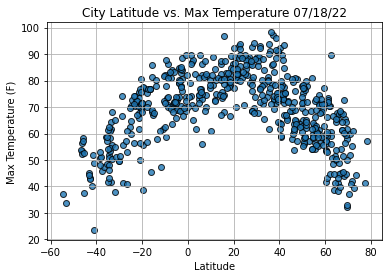

In [32]:
# import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor = "black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

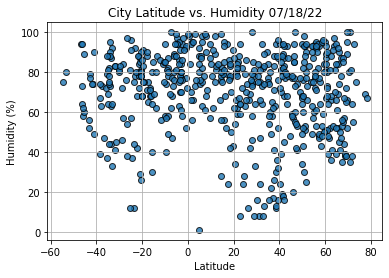

In [33]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           humidity,
           edgecolor = "black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

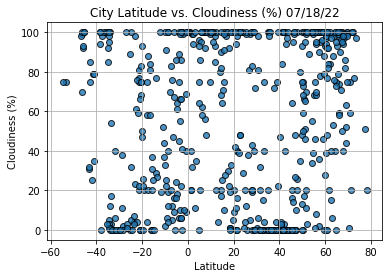

In [34]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

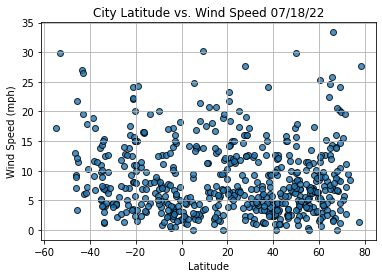

In [35]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [57]:
# import linregress
from scipy.stats import linregress

# create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
        # run regression on hemisphere weather data.
        (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
        
        # calculate the regression line "y values" from the slope and intercept.
        regress_values = x_values * slope + intercept
        
        # get the equation of the line.
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        
        # create a scatter plot and plot the regression line.
        plt.scatter(x_values, y_values)
        plt.plot(x_values, regress_values, "r")
        
        # annotate the text for the line equation
        plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
        plt.title(title)
        plt.xlabel("Latitude")
        plt.ylabel(y_label)
        plt.show()

In [58]:
index13 = city_data_df.loc[13]
index13

City                      Ternate
Country                        ID
Date          2022-07-18 04:07:45
Lat                           0.8
Lng                         127.4
Max Temp                    79.23
Humidity                       84
Cloudiness                    100
Wind Speed                   3.02
Name: 13, dtype: object

In [59]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4       True
       ...  
552     True
553     True
554     True
555     True
556     True
Name: Lat, Length: 557, dtype: bool

In [60]:
city_data_df.loc[(city_data_df ["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Tuktoyaktuk,CA,2022-07-18 04:02:11,69.4541,-133.0374,57.94,66,100,14.61
4,Cherskiy,RU,2022-07-18 04:07:40,68.7500,161.3000,56.28,38,82,20.27
7,La Ronge,CA,2022-07-18 04:07:42,55.1001,-105.2842,63.09,60,68,0.29
8,Mehamn,NO,2022-07-18 04:07:42,71.0357,27.8492,51.75,100,75,5.75
10,Nikolskoye,RU,2022-07-18 04:00:40,59.7035,30.7861,57.87,95,93,5.46


In [61]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

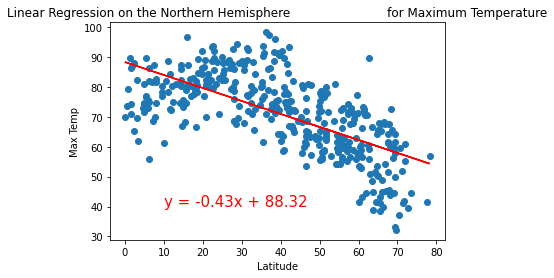

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

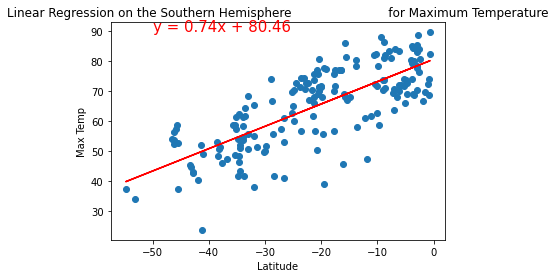

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

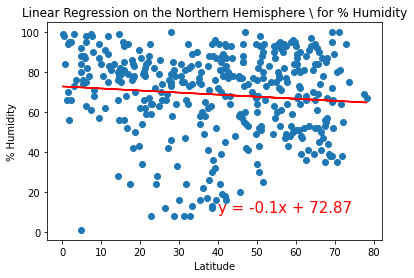

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ for % Humidity', '% Humidity',(40,10))

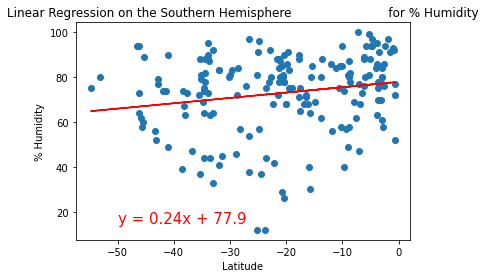

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

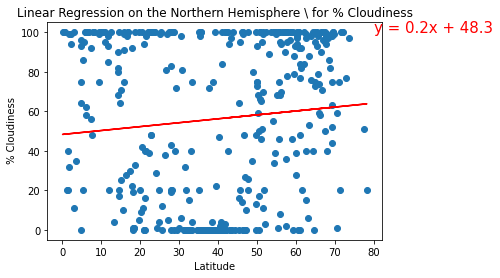

In [77]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ for % Cloudiness', ' % Cloudiness',(80,100))

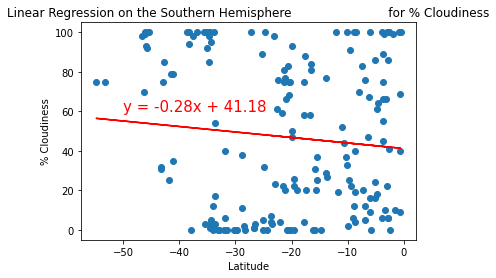

In [78]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

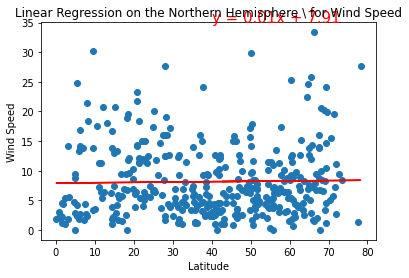

In [83]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ for Wind Speed', 'Wind Speed',(40,35))

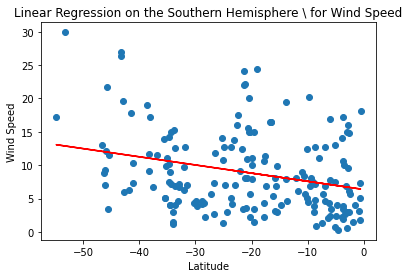

In [88]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ for Wind Speed', 'Wind Speed',(-60,40))